# Project 4

In this project, you will summarize and present your analysis from Projects 1-3.

### Intro: Write a problem Statement/ Specific Aim for this project

Answer: Using the UCLA data set, we will predict the likelyhood of getting into graduate school given GRE scores, GPA scores, and a 4-level estimate of the schools prestige.

### Dataset:  Write up a description of your data and any cleaning that was completed

In [17]:
# lets check out the data again and do the cleaning 
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import scipy as sp
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
%matplotlib inline
df_raw = pd.read_csv("../assets/admissions.csv")
#check for na
nulls = df_raw.isnull().sum()
print nulls
#drop and check again
df_raw = df_raw.dropna()
nulls = df_raw.isnull().sum()
print nulls
# get dummies and drop orginal
df_dummies = df_raw.join(pd.get_dummies(df_raw['prestige'], prefix='prestige'))
df_dummies = df_dummies.drop('prestige', axis = 1)
df_dummies.head()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64
admit       0
gre         0
gpa         0
prestige    0
dtype: int64


,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0.0,0.0,1.0,0.0
1,1,660.0,3.67,0.0,0.0,1.0,0.0
2,1,800.0,4.00,1.0,0.0,0.0,0.0
3,1,640.0,3.19,0.0,0.0,0.0,1.0
4,0,520.0,2.93,0.0,0.0,0.0,1.0


Answer: GRE and GPA are continuous variables, while admit and prestige are categorical. There were several NAN entries, so we had to drop rows that contained those entries. We also had to transform prestige into a series of binary variables using .get_dummies().

### Demo: Provide a table that explains the data by admission status

In [12]:
df_dummies.groupby(df_dummies.admit).mean().T

admit,0,1
gre,573.579336,618.571429
gpa,3.347159,3.489206
prestige_1.0,0.103321,0.261905
prestige_2.0,0.350554,0.420635
prestige_3.0,0.343173,0.222222
prestige_4.0,0.202952,0.095238


In [14]:
df_dummies.groupby(df_dummies.admit).std().T

admit,0,1
gre,116.052798,109.257233
gpa,0.376355,0.371655
prestige_1.0,0.304941,0.441426
prestige_2.0,0.478026,0.495632
prestige_3.0,0.475647,0.417399
prestige_4.0,0.402941,0.294715


### Methods: Write up the methods used in your analysis

Answer: First, we explored the data and determined what distribution the data came from, if it could be identified. Then, we performed a logistic regression on the data to see if we could predict admittance based on the other variables. 

### Results: Write up your results

Answer: As we can see below, the model has a high precision, recall, and accuracy, but is nowhere near perfect, though is is better than random. It would seem that we can predict admittance better than random based on the data. 

### Visuals: Provide a table or visualization of these results

In [7]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df_raw[cols_to_keep].join(df_dummies.ix[:, 'prestige_2.0':])
data['intercept'] = 1.0
data.head()

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0,intercept
0,0,380.0,3.61,0.0,1.0,0.0,1.0
1,1,660.0,3.67,0.0,1.0,0.0,1.0
2,1,800.0,4.00,0.0,0.0,0.0,1.0
3,1,640.0,3.19,0.0,0.0,1.0,1.0
4,0,520.0,2.93,0.0,0.0,1.0,1.0


In [27]:
#train the model and predict
from sklearn.cross_validation import train_test_split
X = data.drop('admit', axis = 1)
y = data['admit']

X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.5)
logmodel = LogisticRegression()
#fit the model on the training set
logmodel.fit(X_train, y_train)

#predict on test set
actuals = logmodel.predict(X_test) 
probas = logmodel.predict_proba(X_test)

In [28]:
# confusion matrix 
metrics.confusion_matrix(actuals, y_test)

array([[121,  43],
       [ 21,  14]])

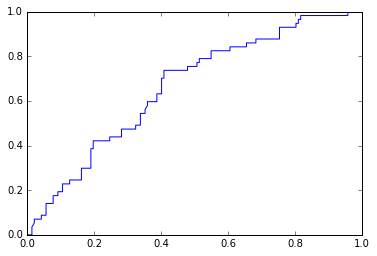

In [29]:
#plot the roc curve 
plt.plot(metrics.roc_curve(y_test, probas[:,1])[0], metrics.roc_curve(y_test, probas[:,1])[1])

In [30]:
#classification report
print metrics.classification_report(actualls, y_test)

             precision    recall  f1-score   support

          0       0.85      0.74      0.79       164
          1       0.25      0.40      0.30        35

avg / total       0.75      0.68      0.71       199



In [32]:
# accuracy score
metrics.accuracy_score(actuals, y_test)

0.67839195979899503

### Discussion: Write up your discussion and future steps

Answer: It is possible to predict graduate school admissions with some degree of success.  However, this dataset is not well described. To further explore this area of inquiry, a much larger, much more precise dataset is needed, preferably with a desription of how the 'prestige' variable is calculated. It would be nice to have further variables, like ability to pay, family alumni status, or even a breakdown by intended area of study, so that we could do a more granular analysis. It would also be interesting to try different classification methods to find the one that best fits the dataset. 